<a href="https://colab.research.google.com/github/AmlAboElanin/LA-Crime-Data-Analysis-by-bython/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Link : https://www.kaggle.com/datasets/yasserh/titanic-dataset
 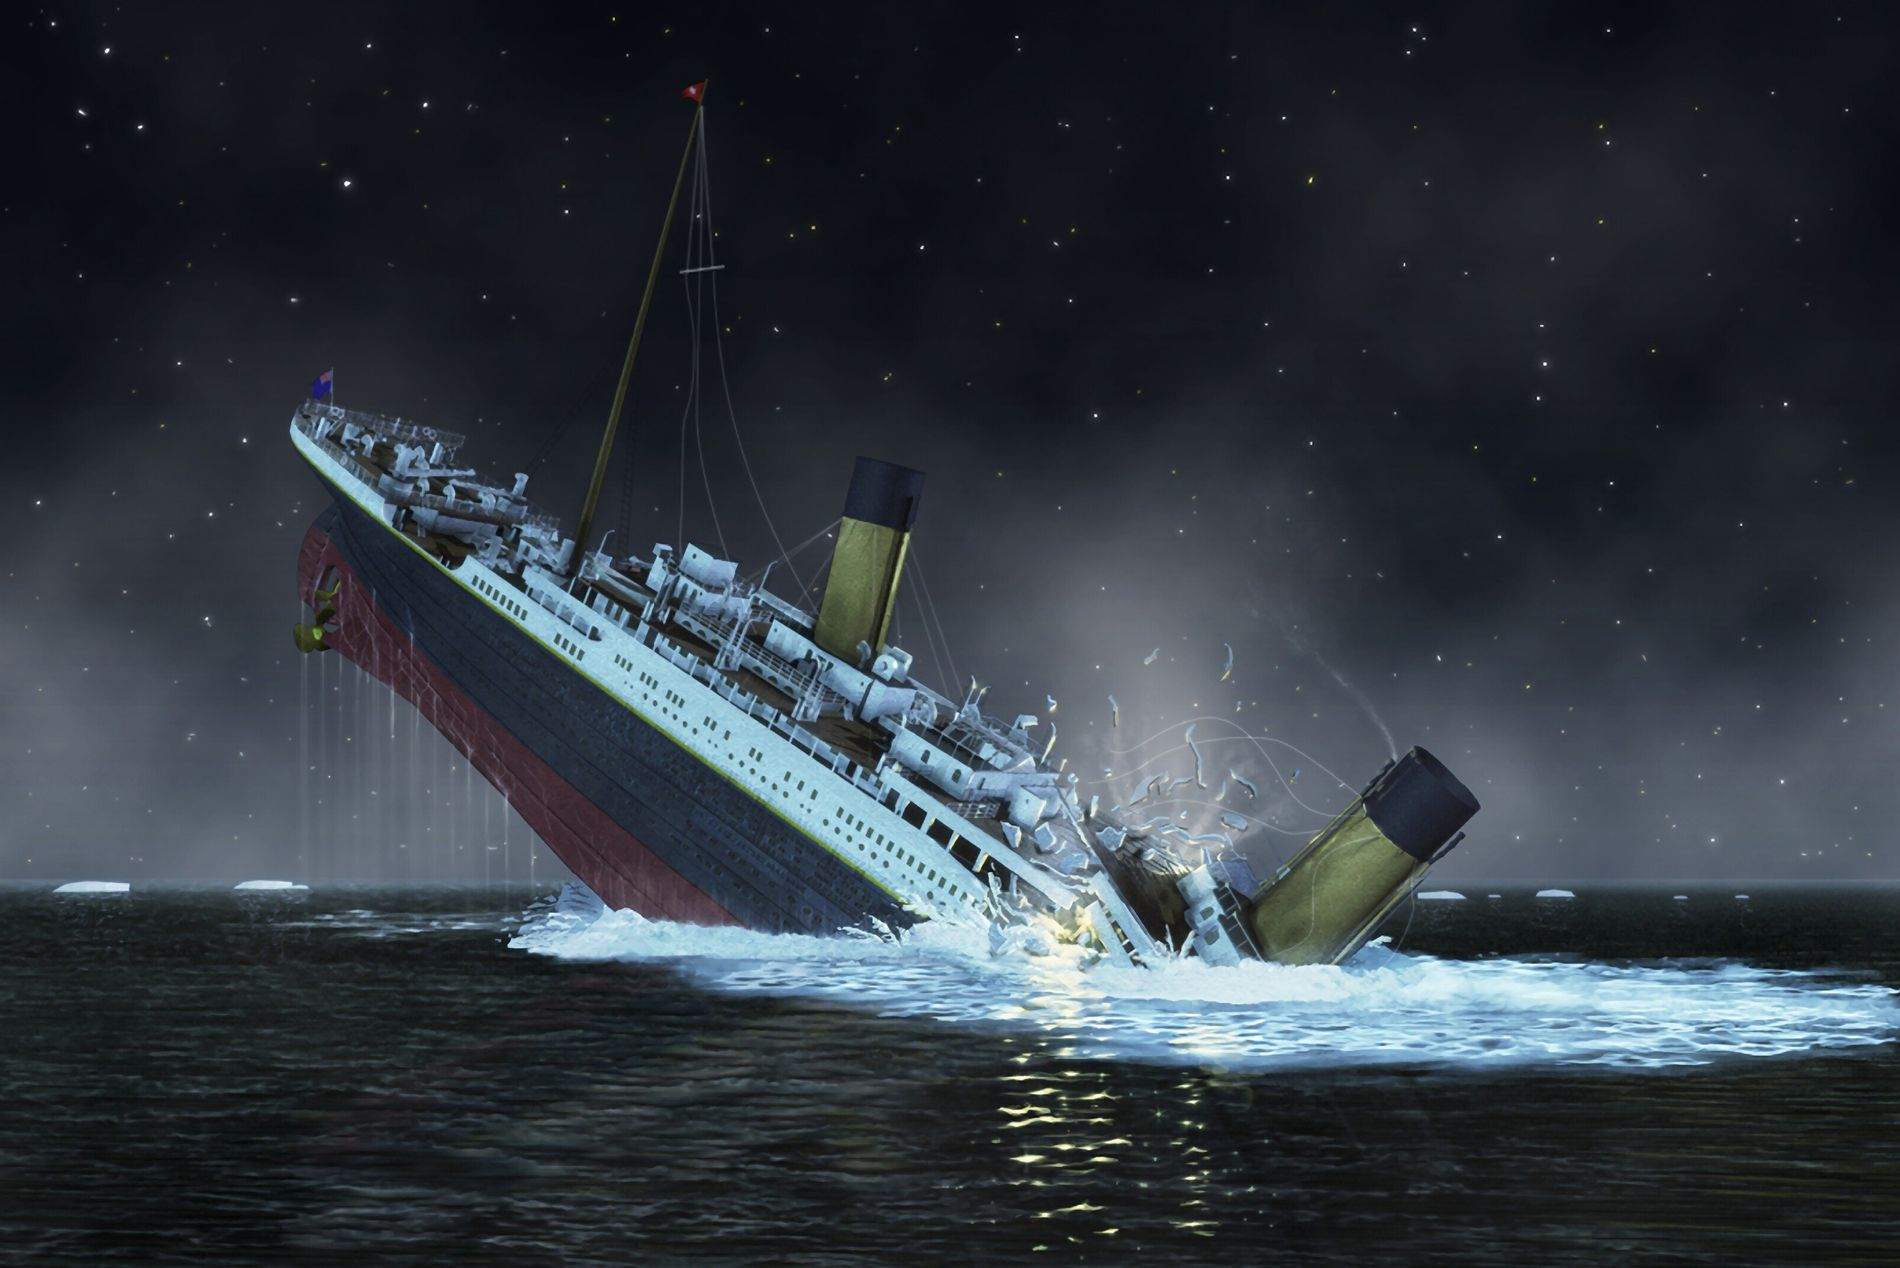

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'] = pd.to_numeric(df['Age'],   errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
#mode()[0]:معناه يرجع اول قيمة اتكررت لو عنده اكتر من قيمة
#mode():معناه رجع اكتر قيمة اتكررت .لو مرجعش ايرور يبقى هى كانت قيمة واحدة

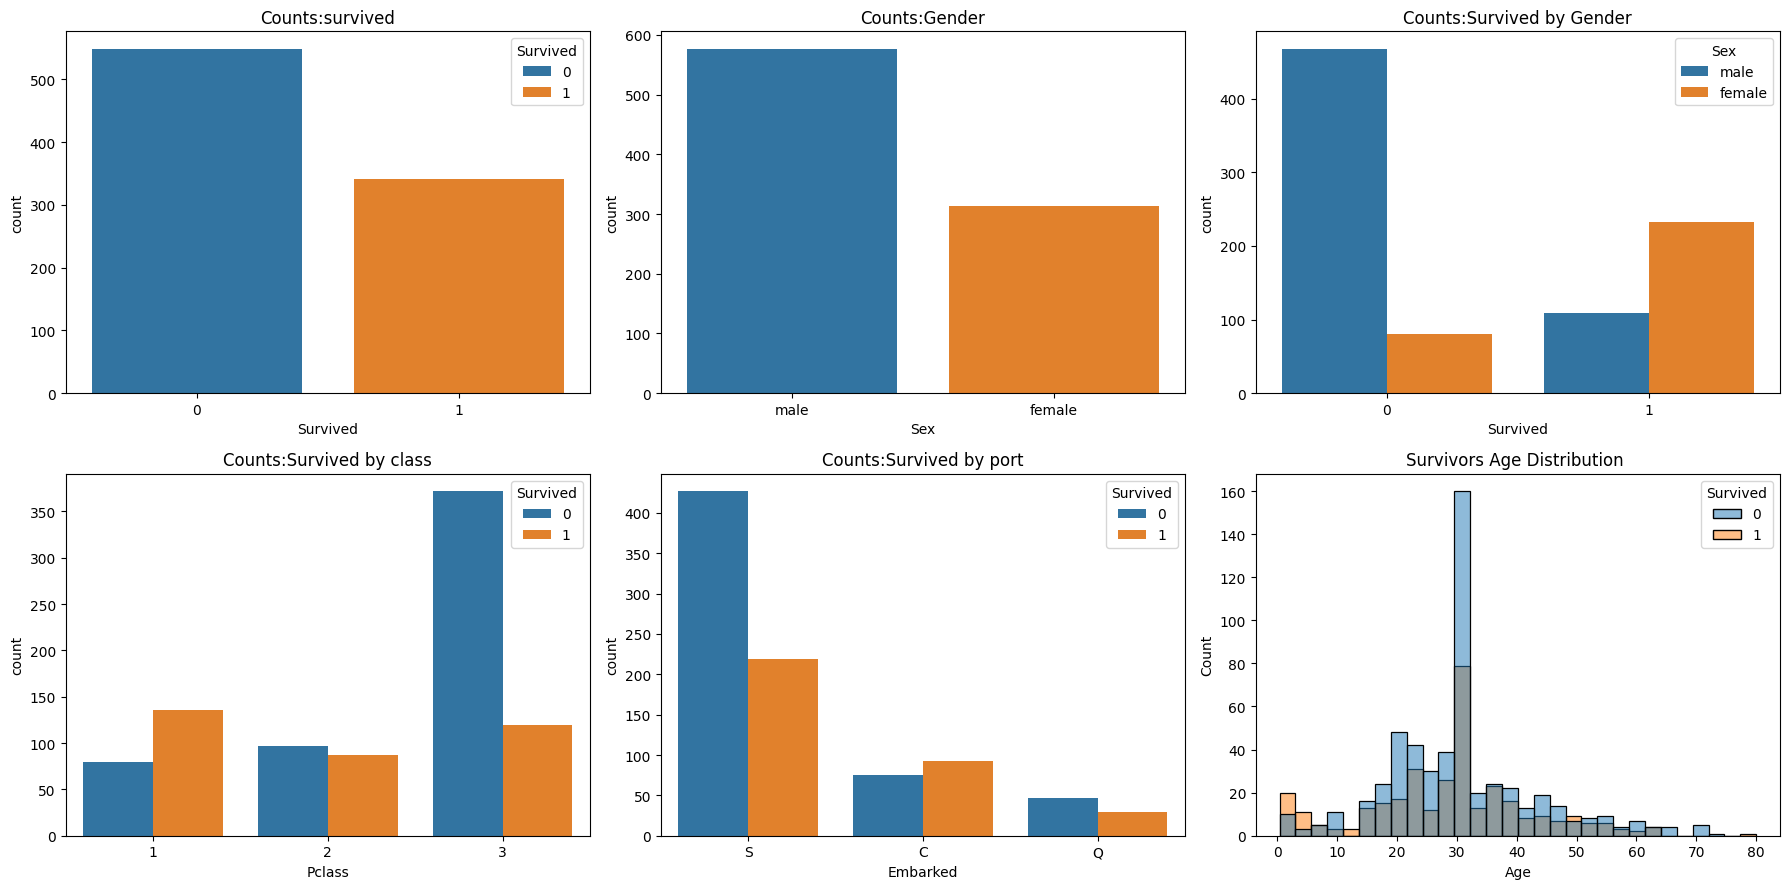

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(18,9))
sns.countplot(data=df,x='Survived',hue='Survived',ax=ax[0,0])
ax[0,0].set_title("Counts:survived")

sns.countplot(data=df,x='Sex',hue='Sex',ax=ax[0,1])
ax[0,1].set_title("Counts:Gender")

sns.countplot(data=df,x='Survived',hue='Sex',ax=ax[0,2])
ax[0,2].set_title("Counts:Survived by Gender")

sns.countplot(data=df,x='Pclass',hue='Survived',ax=ax[1,0])
ax[1,0].set_title("Counts:Survived by class")

sns.countplot(data=df,x='Embarked',hue='Survived',ax=ax[1,1])
ax[1,1].set_title("Counts:Survived by port")

sns.histplot(data=df,x='Age',hue='Survived',ax=ax[1,2])
ax[1,2].set_title("Survivors Age Distribution ")

plt.tight_layout()
plt.show()


In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile=ProfileReport(df,title='Titanic EDA Report',explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 46.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

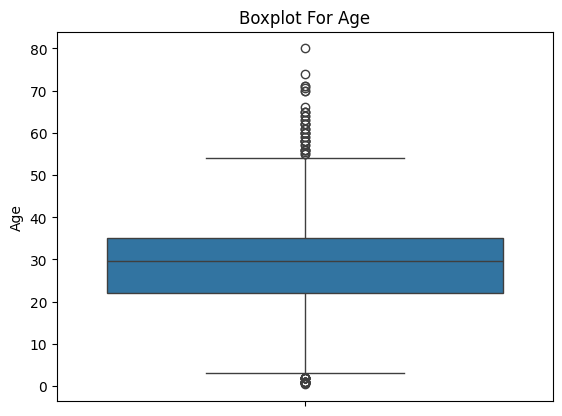

In [ ]:
sns.boxplot(data=df['Age'])
plt.title('Boxplot For Age')
plt.show()

In [ ]:
def winsorize_fun(s,lower_q=0.01,upper_Q=0.99):  # we created a Fn.
    low,high =s.quantile(lower_q),s.quantile(upper_Q)
    return s.clip(lower=low,upper=high)

In [ ]:
df['Age']=winsorize_fun(df['Age'])

In [ ]:
sns.boxplot(data=df['Fare'])
plt.title('Boxplot For Fare')
plt.show()

In [ ]:
df['Fare']=winsorize_fun(df['Fare'])

In [ ]:
df['Sex_num']=df['Sex'].map({'female':1,'male':0})

In [ ]:
df['Survived'].corr(df['Sex_num'])

np.float64(0.5433513806577555)

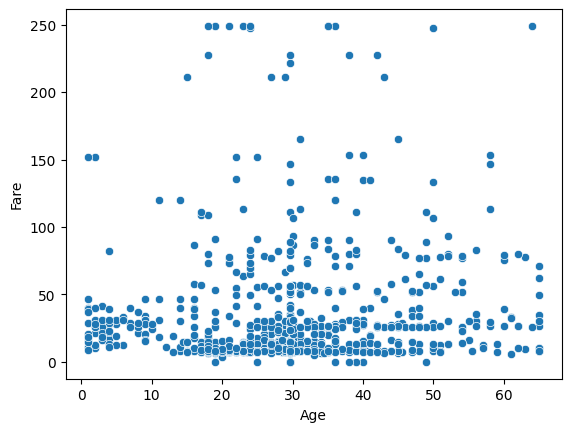

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Fare'])
plt.show()

In [ ]:
 num_col=['Age','Fare','Sex_num','Pclass','SibSp']

<Axes: >

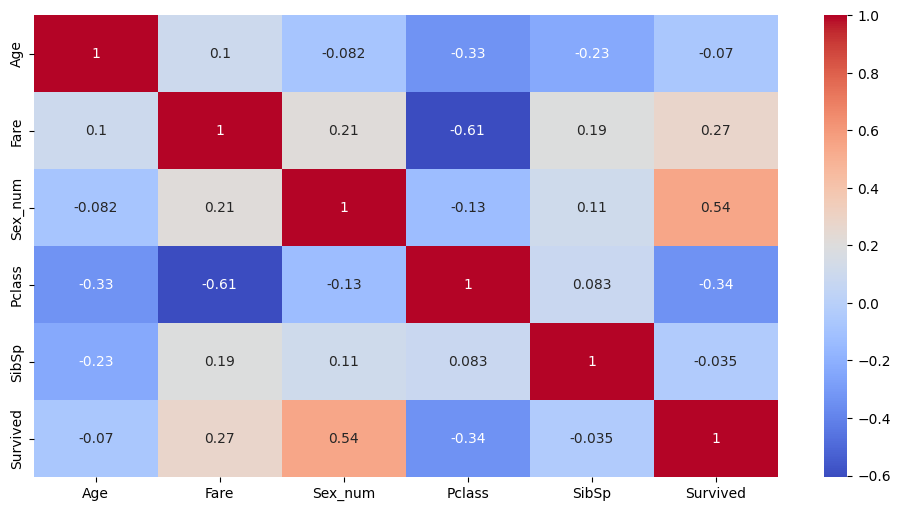

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_col+['Survived']].corr(),annot=True,cmap='coolwarm')

#annot = annotation,


#Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split  #انا بستدعى المكتبة البيرة بيبقى جواها modules اصغر
from sklearn.linear_model import LinearRegression #دهة ال module  اللى فى ال modle بتاعى
from sklearn.metrics import mean_squared_error  #ده ال module  اللى هعمل بيه  test على بتاعى

In [ ]:
x=df[['Pclass']]
y=df['Fare']

In [ ]:
#لازم بالترتيب ,
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=405 )

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
x_test

Pclass
430       1
628       3
229       3
227       3
284       1
..      ...
250       3
174       1
522       3
57        3
134       2

[179 rows x 1 columns]

In [ ]:
y_predict

array([67.77121938,  9.86461861,  9.86461861,  9.86461861, 67.77121938,
       67.77121938, 67.77121938,  9.86461861,  9.86461861, 67.77121938,
        9.86461861, 67.77121938,  9.86461861, 67.77121938,  9.86461861,
       67.77121938,  9.86461861,  9.86461861,  9.86461861,  9.86461861,
       67.77121938, 67.77121938,  9.86461861,  9.86461861, 67.77121938,
       38.817919  , 67.77121938,  9.86461861, 67.77121938,  9.86461861,
        9.86461861,  9.86461861,  9.86461861, 38.817919  ,  9.86461861,
        9.86461861,  9.86461861, 67.77121938, 67.77121938,  9.86461861,
        9.86461861, 38.817919  ,  9.86461861,  9.86461861,  9.86461861,
        9.86461861, 38.817919  , 67.77121938, 67.77121938,  9.86461861,
       38.817919  , 67.77121938,  9.86461861,  9.86461861,  9.86461861,
        9.86461861,  9.86461861, 67.77121938, 67.77121938,  9.86461861,
       38.817919  , 67.77121938,  9.86461861,  9.86461861, 67.77121938,
        9.86461861,  9.86461861,  9.86461861, 38.817919  ,  9.86

In [ ]:
y_test

430    26.5500
628     7.8958
229    25.4667
227     7.2500
284    26.0000
        ...   
250     7.2500
174    30.6958
522     7.2250
57      7.2292
134    13.0000
Name: Fare, Length: 179, dtype: float64

In [ ]:
mean_squared_error(y_test,y_predict)

1966.1636263412354

#Logistic Regresstion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [ ]:
x=df[['Pclass','Age','Sex_num','Fare']]
y=df['Survived']

In [ ]:
x_trainn,x_testt,y_trainn,y_testt=train_test_split(x,y,test_size=0.2,random_state=10 )

In [ ]:
model_l=LogisticRegression()

In [ ]:
model_l.fit(x_trainn,y_trainn)

LogisticRegression()

In [ ]:
y_pred=model_l.predict(x_testt)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [ ]:
r2_score(y_pred,y_testt)

0.25114709851551975

In [ ]:
accuracy_score(y_pred,y_testt)

0.8268156424581006

In [ ]:
test=pd.DataFrame({'Pclass':1,
                    'Age':55,
                    'Sex_num':1,
                    'Fare':75}, index=[0])
y_pred=model_l.predict(test)

In [ ]:
y_pred

array([1])